# **<span style="color: orange;"> Representation Techniques </span>**
Loading the dataframes from the first Notebook-file to proceed with representation techniques.In this chapter, we will explore various text representation techniques that are essential for natural language processing (NLP) tasks. These techniques transform text data into numerical representations that can be used by machine learning models. The key techniques we will cover include:


In [193]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\maxim\desktop\aiia\.venv\lib\site-packages (3.9.1)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
# Read xsl file
df = pd.read_excel('df_complete_cleansing.xlsx')
df.head()
df.isna().sum()
  

SenderID             0
ReceiverID           0
ActionType           0
NegoOutcome          0
Content              4
Content_Length       0
Sentence_Count       0
Word_Count_nltk      0
NegoOutcomeLabel     0
Sentiment            0
SentimentCategory    0
dtype: int64

In [195]:
# Calculate the cumulative length of each exchanged message
df['Negotiation_Content_Length_sum'] = df.groupby(['SenderID', 'ReceiverID'])['Content_Length'].cumsum()

# Display the DataFrame
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory,Negotiation_Content_Length_sum
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,2529,17,470,1,0.213699,Positive,2529
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,2579,21,483,1,0.165002,Positive,2579
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,2336,15,454,1,0.222533,Positive,4865
3,69,70,Counteroffer,FinalAccept,swift reply read set proposal discussed collea...,1961,13,381,1,0.160333,Positive,4540
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1917,10,376,1,0.122500,Positive,6782
...,...,...,...,...,...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,latest offer point completely let u take corpo...,1755,21,358,0,0.285340,Positive,6376
2328,856,851,Counteroffer,FinalReject,much latest offer happy could already reached ...,1460,17,294,0,0.282807,Positive,7227
2329,851,856,Counteroffer,FinalReject,meyer fast answer happy found solution issue n...,673,10,144,0,0.251786,Positive,7049
2330,856,851,Counteroffer,FinalReject,still interested coming joint result neverthel...,969,9,191,0,0.163158,Positive,8196


In [196]:
# Initialize a new column for negotiation length
df['Negotiation_Length'] = 0

# Function to calculate negotiation length
def calculate_negotiation_length(group):
    length = 0
    for i, row in group.iterrows():
        length += 1
        df.at[i, 'Negotiation_Length'] = length
        if row['ActionType'] in ['FinalAccept', 'FinalReject']:
            break

# Apply the function to each group of SenderID and ReceiverID
df.groupby(['SenderID', 'ReceiverID']).apply(calculate_negotiation_length)

# Display the DataFrame
df.head(30)

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory,Negotiation_Content_Length_sum,Negotiation_Length
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,2529,17,470,1,0.213699,Positive,2529,1
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,2579,21,483,1,0.165002,Positive,2579,1
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,2336,15,454,1,0.222533,Positive,4865,2
3,69,70,Counteroffer,FinalAccept,swift reply read set proposal discussed collea...,1961,13,381,1,0.160333,Positive,4540,2
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1917,10,376,1,0.122500,Positive,6782,3
5,69,70,Counteroffer,FinalAccept,visiting slovenia would lovely look forward vi...,1759,13,332,1,0.074134,Positive,6299,3
6,70,69,Counteroffer,FinalAccept,great already looking forward welcoming sloven...,1105,7,215,1,0.162300,Positive,7887,4
7,70,69,Counteroffer,FinalAccept,message could send direct counteroffer last me...,413,4,86,1,0.259375,Positive,8300,5
8,69,70,Counteroffer,FinalAccept,unfortunately bit bad news explained colleague...,935,6,172,1,0.077778,Positive,7234,4
9,70,69,Counteroffer,FinalAccept,sorry hear offer ha changed short notice appre...,385,4,78,1,0.025000,Positive,8685,6


SenderID 70 sent two counteroffers one after another is this an error in the system or is it possible since in the end he has a total of 8 sent messages and receiver 69 only 6. We will check if the sender id and receiver id follow the strict order of being a b a b instead of a a b a b a b b a. Cell 6 - 7 example.

### **<span style="color: orange;">Bag of Words (BoW)</span>**
While BoW is easy to implement and understand, it has some limitations, such as ignoring word order and context techniques. It involves the following steps:
1. Tokenizing the text into individual words.
2. Creating a vocabulary of all unique words in the corpus.
3. Representing each document as a vector of word counts, where each element of the vector corresponds to the count of a specific word in the document.

In [271]:
from sklearn.feature_extraction.text import CountVectorizer

In [272]:
import pandas as pd

# Count rows with missing values
na_rows = df[df['Content'].isna()]
print(na_rows)

Empty DataFrame
Columns: [SenderID, ReceiverID, ActionType, NegoOutcome, Content, Content_Length, Sentence_Count, Word_Count_nltk, NegoOutcomeLabel, Sentiment, SentimentCategory, Negotiation_Content_Length_sum, Negotiation_Length, Tokenized_Content, Embedding_Vector]
Index: []


In [273]:
import pandas as pd


# Step 1: Remove rows with NaN in Content
df = df.dropna(subset=['Content'])

# Step 2: Remove rows with empty strings or insignificant content in Content
def is_insignificant_content(content):
    return content.strip() == '' or content.strip() == '.' or len(content.split()) == 1

df = df[~df['Content'].apply(is_insignificant_content)]

# Step 3: Validate Content Length (optional, if Content_Length column is used)
df['Content_Length'] = df['Content'].apply(len)

# Step 4: Fit and transform the Content column using CountVectorizer
count_vectorizer = CountVectorizer()
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2324x6613 sparse matrix of type '<class 'numpy.int64'>'
	with 172436 stored elements in Compressed Sparse Row format>

In [274]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data = message_array, columns=count_vectorizer.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [275]:
df_countvectorizer.columns

Index(['abandon', 'abandoned', 'abandoning', 'abdicate', 'aber', 'abiding',
       'ability', 'able', 'abort', 'aboutthe',
       ...
       'zeroemission', 'zurich', 'zürich', 'áafter', 'ánd', 'íteams', 'óf',
       'ülan', 'šimi', 'šmic'],
      dtype='object', length=6613)

In [276]:
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df = 0.01, max_df = 0.99, max_features = 5000) # Define the count vectorizer with n-
message_vector_ngrams = count_vectorizer_ngrams.fit_transform(df['Content']) # Fit and transform the data

In [277]:
message_vector_ngrams.shape

(2324, 1442)

In [278]:
message_ngrams_array = message_vector_ngrams.toarray()
df_countvectorizer_ngrams = pd.DataFrame(data = message_ngrams_array, columns=count_vectorizer_ngrams.get_feature_names_out())
df_countvectorizer_ngrams

,able,able attend,abroad,absent,absolutely,accept,accept additional,accept offer,accept proposal,acceptable,...,write,written,written contract,wrong,wrote,year,yes,young,young people,younger
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2320,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2322,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# XG-Boost Model

In [279]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [280]:
# Define target variable and features
# Assuming `Label` is the target column in your DataFrame
X = df['Content']
y = df['NegoOutcomeLabel']

# Step 2: Bag of Words Representation
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=0.01, max_df=0.99, max_features=5000)
X_vectorized = count_vectorizer.fit_transform(X)

In [281]:

# Convert sparse matrix to dense matrix for easier handling
X_dense = X_vectorized.toarray()

In [282]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Set eval_metric to avoid warnings
xgb_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 76.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       145
           1       0.78      0.92      0.84       320

    accuracy                           0.77       465
   macro avg       0.74      0.67      0.69       465
weighted avg       0.76      0.77      0.75       465



# Naive Bayes

In [283]:
# Import necessary library
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [284]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# Check for negative values in X_train
if np.any(X_train < 0):
    print("Negative values found in X_train. Please preprocess the data.")

# Example preprocessing step: Replace negative values with zero
X_train_NB = np.where(X_train < 0, 0, X_train)

# Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_NB, y_train)

MultinomialNB()

In [285]:
# Make Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [286]:
# Evaluate the Naive Bayes Model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("### Naive Bayes Model ###")
print(f"Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

### Naive Bayes Model ###
Accuracy (Naive Bayes): 68.60%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       145
           1       0.78      0.76      0.77       320

    accuracy                           0.69       465
   macro avg       0.64      0.64      0.64       465
weighted avg       0.69      0.69      0.69       465



# KNN

In [287]:
# Import necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [288]:
# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [289]:
# Make Predictions with KNN
y_pred_knn = knn_model.predict(X_test)

In [290]:
# Evaluate the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("### K-Nearest Neighbors (KNN) Model ###")
print(f"Accuracy (KNN): {accuracy_knn * 100:.2f}%")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

### K-Nearest Neighbors (KNN) Model ###
Accuracy (KNN): 65.59%

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.41      0.23      0.29       145
           1       0.71      0.85      0.77       320

    accuracy                           0.66       465
   macro avg       0.56      0.54      0.53       465
weighted avg       0.61      0.66      0.62       465



# Support Vector Machine

In [291]:
# Import necessary library
from sklearn.svm import SVC

In [292]:
# Train the SVM Model
svm_model = SVC(kernel='sigmoid', probability=True)  # Using a linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [293]:
# Make Predictions with SVM
y_pred_svm = svm_model.predict(X_test)

In [294]:
# Evaluate the SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("### Support Vector Machine (SVM) Model ###")
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

### Support Vector Machine (SVM) Model ###
Accuracy (SVM): 61.08%

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.36      0.33      0.35       145
           1       0.71      0.74      0.72       320

    accuracy                           0.61       465
   macro avg       0.54      0.53      0.53       465
weighted avg       0.60      0.61      0.61       465



# Random Forest Model

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 7: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 75.05%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.25      0.38       145
           1       0.74      0.98      0.84       320

    accuracy                           0.75       465
   macro avg       0.79      0.61      0.61       465
weighted avg       0.77      0.75      0.70       465



# Logistic Regression Model

In [296]:
# Step 8: Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions and Evaluation for Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 72.90%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       145
           1       0.79      0.83      0.81       320

    accuracy                           0.73       465
   macro avg       0.68      0.67      0.67       465
weighted avg       0.72      0.73      0.72       465



# LSTM

In [299]:
#!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/eb/f1/828bbccc84a72db960a7d116f55f3f6aec9f5658f5d32ce9db20142d5742/tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/ae/4e/44ce609139065035c56fe570fe7f0ee8d06180c99a424bac588472052c5d/tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/fb/b4/31c461eef98b96b8a


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [301]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [344]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Pad sequences to ensure equal length (important for LSTM input)
max_sequence_length = max(len(seq) for seq in X_sequences)  # Based on the longest sequence
X_train_padded = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [306]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
#Pad sequences to ensure equal length (important for LSTM input)
max_sequence_length = X.shape[1]  # Based on the dimensionality of embeddings
X_train_padded = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

IndexError: tuple index out of range

In [ ]:
#LSTM Training

#Build LSTM model
model = Sequential([
    Input(shape=(max_sequence_length,)),  # Input layer
    Embedding(input_dim=max_sequence_length, output_dim=128),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer with 64 units
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(2, activation='softmax')  # Output layer with 2 units (binary classification)
])

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())
#Train the model
history = model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
)

In [ ]:
#Save the trained model
model.save("lstm_negotiation_model.h5")
#Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Model Comparison

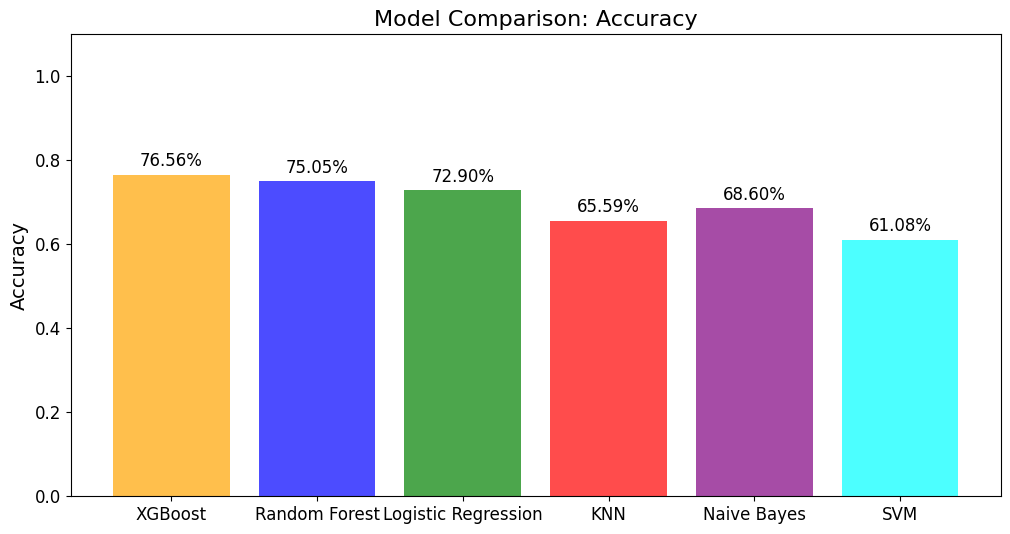


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       145
           1       0.78      0.92      0.84       320

    accuracy                           0.77       465
   macro avg       0.74      0.67      0.69       465
weighted avg       0.76      0.77      0.75       465


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.25      0.38       145
           1       0.74      0.98      0.84       320

    accuracy                           0.75       465
   macro avg       0.79      0.61      0.61       465
weighted avg       0.77      0.75      0.70       465


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       145
           1       0.79      0.83      0.81       320

    accuracy                           0.73       465
   macro avg  

In [223]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Collect model names and accuracies
models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [accuracy, accuracy_rf, accuracy_logreg, accuracy_knn, accuracy_nb, accuracy_svm]

# Display a bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['orange', 'blue', 'green', 'red', 'purple', 'cyan'], alpha=0.7)
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Print detailed classification reports
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

### **<span style="color: orange;">Term Frequency-Inverse Document Frequency (TF-IDF)</span>**
TF-IDF is an extension of the Bag of Words model that aims to address some of its limitations. It assigns a weight to each word based on its frequency in a document (term frequency) and its rarity across the entire corpus (inverse document frequency). TF-IDF helps to highlight important words in a document while down-weighting common words that appear in many documents.

In [313]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [314]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector = tfidf_vectorizer.transform(df['Content'])

In [315]:
tfidf_message_vector.shape

(2324, 6613)

In [316]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data = message_tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      abandon  abandoned  abandoning  abdicate  aber  abiding  ability  \
0         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
1         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
3         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
4         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
...       ...        ...         ...       ...   ...      ...      ...   
2319      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2320      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2321      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2322      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2323      0.0        0.0         0.0       0.0   0.0      0.0      0.0   

          able  abort  aboutthe  ...  zeroemission  zurich    zürich  áafter  \
0     0.042394    0.0       0.0

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', min_df=0.01, max_df=0.99, max_features=5000)
tfidf_message_vector = tfidf_vectorizer.fit_transform(df['Content'])

# Convert sparse matrix to dense matrix for easier handling
tfidf_message_array = tfidf_message_vector.toarray()

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_message_array, df['NegoOutcomeLabel'], test_size=0.2, random_state=42, stratify=df['NegoOutcomeLabel'])


# XG-Boost Model

In [318]:
# Step 3: XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Random Forest Model

In [319]:
# Step 4: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# Logistic Regression

In [320]:
# Step 5: Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Naive Bayes

In [321]:
# Import necessary library
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# Check for negative values in X_train
if np.any(X_train < 0):
    print("Negative values found in X_train. Please preprocess the data.")

# Example preprocessing step: Replace negative values with zero
X_train_NB = np.where(X_train < 0, 0, X_train)

# Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_NB, y_train)
# Make Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)
# Evaluate the Naive Bayes Model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("### Naive Bayes Model ###")
print(f"Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

### Naive Bayes Model ###
Accuracy (Naive Bayes): 73.12%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.76      0.20      0.32       145
           1       0.73      0.97      0.83       320

    accuracy                           0.73       465
   macro avg       0.75      0.59      0.57       465
weighted avg       0.74      0.73      0.67       465



# KNN

In [322]:
# Import necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [323]:
# Ensure X_train and X_test are 2D arrays
X_train = X_train.reshape(-1, 1) if X_train.ndim == 1 else X_train
X_test = X_test.reshape(-1, 1) if X_test.ndim == 1 else X_test

# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)

# Make Predictions with KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("### K-Nearest Neighbors (KNN) Model ###")
print(f"Accuracy (KNN): {accuracy_knn * 100:.2f}%")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

### K-Nearest Neighbors (KNN) Model ###
Accuracy (KNN): 72.90%

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.65      0.28      0.39       145
           1       0.74      0.93      0.83       320

    accuracy                           0.73       465
   macro avg       0.70      0.61      0.61       465
weighted avg       0.71      0.73      0.69       465



# Support Vector Machine

In [324]:
# Import necessary library
from sklearn.svm import SVC
# Train the SVM Model
svm_model = SVC(kernel='sigmoid', probability=True)  # Using a linear kernel
svm_model.fit(X_train, y_train)
# Make Predictions with SVM
y_pred_svm = svm_model.predict(X_test)
# Evaluate the SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("### Support Vector Machine (SVM) Model ###")
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

### Support Vector Machine (SVM) Model ###
Accuracy (SVM): 74.41%

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.71      0.30      0.43       145
           1       0.75      0.94      0.84       320

    accuracy                           0.74       465
   macro avg       0.73      0.62      0.63       465
weighted avg       0.74      0.74      0.71       465



# Model Comparison

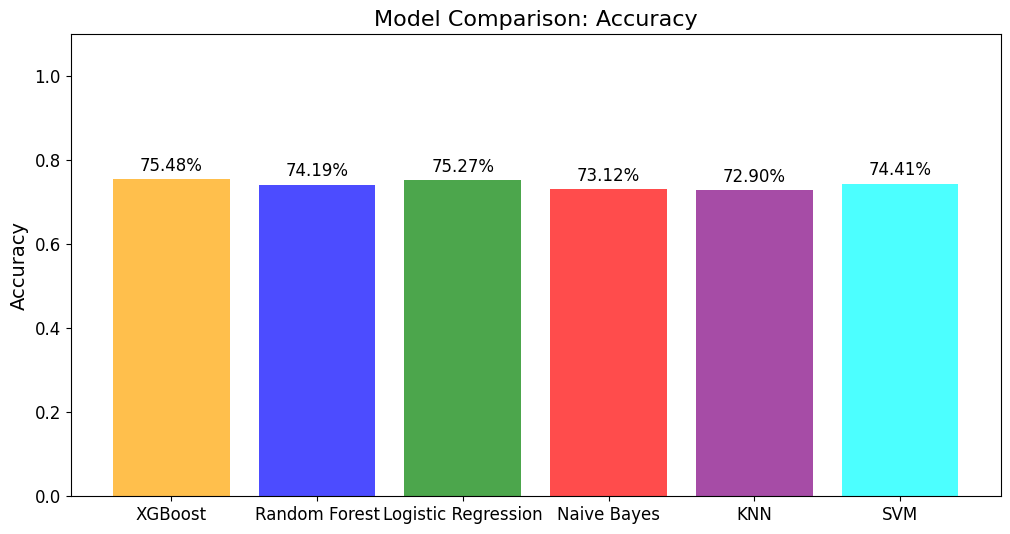


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       145
           1       0.78      0.91      0.84       320

    accuracy                           0.75       465
   macro avg       0.72      0.66      0.68       465
weighted avg       0.74      0.75      0.74       465


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.23      0.35       145
           1       0.74      0.97      0.84       320

    accuracy                           0.74       465
   macro avg       0.77      0.60      0.60       465
weighted avg       0.76      0.74      0.69       465


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.26      0.39       145
           1       0.74      0.98      0.84       320

    accuracy                           0.75       465
   macro avg  

In [236]:
# Compare Models
models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'KNN', 'SVM']
accuracies = [accuracy_xgb, accuracy_rf, accuracy_logreg, accuracy_nb, accuracy_knn, accuracy_svm]

# Display a bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['orange', 'blue', 'green', 'red', 'purple', 'cyan'], alpha=0.7)
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Print Detailed Classification Reports
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

### **<span style="color: orange;">Word Embeddings</span>**
Word embeddings are dense vector representations of words that capture semantic relationships between them. Unlike BoW and TF-IDF, word embeddings consider the context in which words appear. Popular word embedding techniques include:
- **Word2Vec**: Uses neural networks to learn word vectors based on their context in a large corpus.
- **GloVe (Global Vectors for Word Representation)**: Combines the advantages of matrix factorization and context-based learning.
- **FastText**: An extension of Word2Vec that considers subword information, making it more robust to rare and misspelled words.

In [238]:
#%pip install scipy==1.12

In [327]:
import nltk
#nltk.download('vader_lexicon')
nltk.download("word2vec_sample")

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [240]:
#%pip install gensim

In [328]:
import gensim
from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pre_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [329]:
len(pre_w2v_model.key_to_index)

43981

In [330]:
len(pre_w2v_model['negotiation'])

300

In [331]:
pre_w2v_model.most_similar(positive=["negotiation"], topn=20)

[('negotiations', 0.8168567419052124),
 ('negotiating', 0.7531847357749939),
 ('bargaining', 0.6434566974639893),
 ('negotiate', 0.6341555118560791),
 ('negotiated', 0.6292651295661926),
 ('talks', 0.6133743524551392),
 ('discussions', 0.6095365881919861),
 ('dialogue', 0.5417248606681824),
 ('haggling', 0.5341888070106506),
 ('agreement', 0.501986026763916),
 ('impasse', 0.48809322714805603),
 ('consultations', 0.4769951105117798),
 ('discussion', 0.465476393699646),
 ('compromise', 0.4547061026096344),
 ('Discussions', 0.4485512673854828),
 ('brinkmanship', 0.4476183354854584),
 ('agreements', 0.4455186724662781),
 ('ratification', 0.4414721131324768),
 ('preconditions', 0.435526579618454),
 ('tripartite', 0.4344906508922577)]

In [332]:
pre_w2v_model.most_similar(positive=["negotiation"], negative=["agreement"], topn=10)

[('diplomacy', 0.3239063024520874),
 ('dialogue', 0.2918771207332611),
 ('Interviewing', 0.28622379899024963),
 ('politicking', 0.28376880288124084),
 ('tactful', 0.2724672853946686),
 ('debates', 0.272152304649353),
 ('bargaining', 0.2721068859100342),
 ('negotiations', 0.270591139793396),
 ('circumlocution', 0.2700679302215576),
 ('brinkmanship', 0.26783785223960876)]

In [333]:
print(pre_w2v_model)

KeyedVectors<vector_size=300, 43981 keys>


In [334]:
pre_w2v_model["negotiation"]

array([ 0.00503933,  0.0736899 , -0.0289142 ,  0.0624547 ,  0.0555153 ,
       -0.00116173,  0.0282533 , -0.0617938 ,  0.0565066 ,  0.0799685 ,
       -0.105743  ,  0.0134658 , -0.0305665 ,  0.0114005 , -0.107065  ,
        0.0806294 ,  0.1183    ,  0.00462627,  0.0256097 , -0.0156963 ,
        0.00078481,  0.067081  ,  0.00380015,  0.0852556 ,  0.0328796 ,
        0.0591502 , -0.109709  , -0.073029  ,  0.00805467, -0.044941  ,
        0.00305665, -0.0213139 , -0.0421321 ,  0.0456018 ,  0.0859165 ,
        0.0627852 , -0.00082612,  0.00636113,  0.0684028 , -0.148041  ,
        0.041306  ,  0.0391581 , -0.0366797 ,  0.0156137 , -0.15465   ,
        0.0105743 ,  0.00328383,  0.0137962 , -0.136145  ,  0.0845947 ,
       -0.00850904, -0.00950039, -0.0489063 , -0.035358  , -0.016605  ,
        0.0342014 ,  0.0472541 ,  0.00570023,  0.0614634 ,  0.041306  ,
       -0.142754  ,  0.0555153 , -0.0290794 ,  0.1031    ,  0.0138788 ,
        0.0829425 ,  0.03321   ,  0.0345318 ,  0.027262  , -0.11

In [335]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Prepare Word Embedding Features
def get_mean_vector(word2vec_model, words):
    """
    Generate the mean vector for a document by averaging word embeddings.
    If a word is not in the model's vocabulary, it is skipped.
    """
    valid_words = [word for word in words if word in word2vec_model]
    if not valid_words:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model[valid_words], axis=0)

# Tokenize the text into words and calculate mean embeddings
df['Tokenized_Content'] = df['Content'].apply(lambda x: x.split())
df['Embedding_Vector'] = df['Tokenized_Content'].apply(lambda x: get_mean_vector(pre_w2v_model, x))

# Convert list of vectors to a matrix
X_embedding = np.vstack(df['Embedding_Vector'].to_numpy())
y = df['NegoOutcomeLabel']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_embedding, y, test_size=0.2, random_state=42, stratify=y)


# XG-Boost Model

In [336]:
# Step 3: XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


# Random Forest Model

In [337]:
# Step 4: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Loggistic Regression

In [338]:
# Step 5: Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Naive Bayes

In [339]:
# Import necessary library
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# Check for negative values in X_train
if np.any(X_train < 0):
    print("Negative values found in X_train. Please preprocess the data.")

# Example preprocessing step: Replace negative values with zero
X_train_NB = np.where(X_train < 0, 0, X_train)

# Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_NB, y_train)
# Make Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)
# Evaluate the Naive Bayes Model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("### Naive Bayes Model ###")
print(f"Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Negative values found in X_train. Please preprocess the data.
### Naive Bayes Model ###
Accuracy (Naive Bayes): 68.82%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.69      1.00      0.82       320

    accuracy                           0.69       465
   macro avg       0.34      0.50      0.41       465
weighted avg       0.47      0.69      0.56       465



# KNN

In [340]:
# Import necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)
# Make Predictions with KNN
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("### K-Nearest Neighbors (KNN) Model ###")
print(f"Accuracy (KNN): {accuracy_knn * 100:.2f}%")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


### K-Nearest Neighbors (KNN) Model ###
Accuracy (KNN): 68.82%

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.50      0.28      0.36       145
           1       0.73      0.87      0.79       320

    accuracy                           0.69       465
   macro avg       0.61      0.58      0.58       465
weighted avg       0.66      0.69      0.66       465



# Support Vector Machine

In [341]:
# Import necessary library
from sklearn.svm import SVC
# Train the SVM Model
svm_model = SVC(kernel='sigmoid', probability=True)  # Using a linear kernel
svm_model.fit(X_train, y_train)
# Make Predictions with SVM
y_pred_svm = svm_model.predict(X_test)
# Evaluate the SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("### Support Vector Machine (SVM) Model ###")
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

### Support Vector Machine (SVM) Model ###
Accuracy (SVM): 68.17%

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.69      0.99      0.81       320

    accuracy                           0.68       465
   macro avg       0.34      0.50      0.41       465
weighted avg       0.47      0.68      0.56       465



# Model Comparison

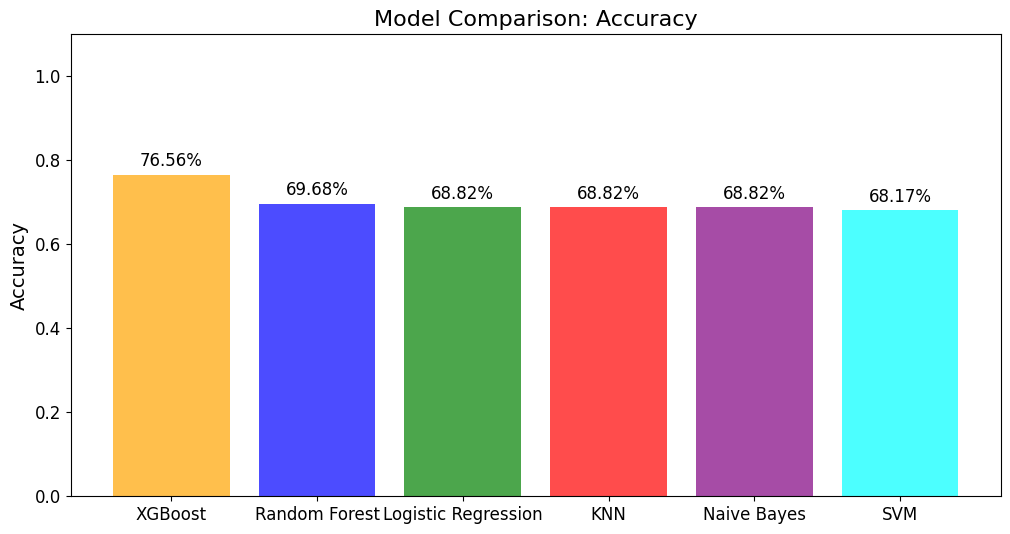


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       145
           1       0.78      0.92      0.84       320

    accuracy                           0.77       465
   macro avg       0.74      0.67      0.69       465
weighted avg       0.76      0.77      0.75       465


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.09      0.16       145
           1       0.70      0.97      0.82       320

    accuracy                           0.70       465
   macro avg       0.65      0.53      0.49       465
weighted avg       0.67      0.70      0.61       465


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.69      1.00      0.82       320

    accuracy                           0.69       465
   macro avg  

In [255]:
# Collect model names and accuracies
models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [accuracy, accuracy_rf, accuracy_logreg, accuracy_knn, accuracy_nb, accuracy_svm]

# Display a bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['orange', 'blue', 'green', 'red', 'purple', 'cyan'], alpha=0.7)
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Print detailed classification reports
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

### **<span style="color: orange;">Self Trained embeddings</span>**

These embeddings are particularly useful for specialized domains where pre-trained embeddings may not perform well. In machine learning, self-trained embeddings can enhance text classification, clustering, and similarity measurement tasks by providing dense and informative text representations. For Recurrent Neural Networks (RNNs), self-trained embeddings improve sequence modeling and contextual understanding, making them effective for tasks like language modeling, machine translation, and text generation. Overall, self-trained embeddings enable models to leverage rich semantic information from the text, leading to more accurate predictions and outputs.

In [345]:
df['Content']

0       hope well management company agreed building f...
1       reaching mei apologize slight delay getting ba...
2       r kind response need hurry guess face daily fi...
3       swift reply read set proposal discussed collea...
4       proposal effort far seems getting close resolv...
                              ...                        
2327    latest offer point completely let u take corpo...
2328    much latest offer happy could already reached ...
2329    meyer fast answer happy found solution issue n...
2330    still interested coming joint result neverthel...
2331    sorry accept less understand argument like las...
Name: Content, Length: 2324, dtype: object

In [346]:
nego_message_data = df["Content"]
df_nego_message_data = pd.DataFrame(nego_message_data)
df_nego_message_data

,Content
0,hope well management company agreed building f...
1,reaching mei apologize slight delay getting ba...
2,r kind response need hurry guess face daily fi...
3,swift reply read set proposal discussed collea...
4,proposal effort far seems getting close resolv...
...,...
2327,latest offer point completely let u take corpo...
2328,much latest offer happy could already reached ...
2329,meyer fast answer happy found solution issue n...
2330,still interested coming joint result neverthel...


In [347]:
import nltk
from nltk.tokenize import word_tokenize

# Download the "punkt" model if not already preinstalled as before ind pre processing
nltk.download('punkt_tab')


df_nego_message_data['Tolenized_Content'] = df_nego_message_data['Content'].apply(word_tokenize)
df_nego_message_data

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Content,Tolenized_Content
0,hope well management company agreed building f...,"[hope, well, management, company, agreed, buil..."
1,reaching mei apologize slight delay getting ba...,"[reaching, mei, apologize, slight, delay, gett..."
2,r kind response need hurry guess face daily fi...,"[r, kind, response, need, hurry, guess, face, ..."
3,swift reply read set proposal discussed collea...,"[swift, reply, read, set, proposal, discussed,..."
4,proposal effort far seems getting close resolv...,"[proposal, effort, far, seems, getting, close,..."
...,...,...
2327,latest offer point completely let u take corpo...,"[latest, offer, point, completely, let, u, tak..."
2328,much latest offer happy could already reached ...,"[much, latest, offer, happy, could, already, r..."
2329,meyer fast answer happy found solution issue n...,"[meyer, fast, answer, happy, found, solution, ..."
2330,still interested coming joint result neverthel...,"[still, interested, coming, joint, result, nev..."


In [348]:
sentences = df_nego_message_data['Tolenized_Content'].tolist()
sentences

[['hope',
  'well',
  'management',
  'company',
  'agreed',
  'building',
  'fruitful',
  'partnership',
  'face',
  'upcoming',
  'disruption',
  'market',
  'best',
  'innovation',
  'green',
  'spirit',
  'would',
  'like',
  'introduce',
  'nasa',
  'nova',
  'reaching',
  'tighten',
  'general',
  'term',
  'harm',
  'ag',
  'established',
  'round',
  'discussion',
  'far',
  'please',
  'find',
  'attached',
  'proposal',
  'open',
  'issue',
  'joint',
  'venture',
  'would',
  'like',
  'explain',
  'following',
  'director',
  'would',
  'like',
  'address',
  'unsolved',
  'issue',
  'number',
  'director',
  'sent',
  'since',
  'agreed',
  'decisionmaking',
  'committee',
  'consisting',
  'member',
  'simple',
  'majority',
  'power',
  'strongly',
  'suggest',
  'dividing',
  'seat',
  'svn',
  'tech',
  'would',
  'able',
  'deal',
  'local',
  'authority',
  'partner',
  'successfully',
  'using',
  'strong',
  'local',
  'network',
  'relationship',
  'engineer',
  '

In [349]:
from gensim.models.word2vec import Word2Vec

ourfirst_w2v_model = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, workers=4)
ourfirst_w2v_model.save("ourfirst_w2v_model")
ourfirst_w2v_model

In [350]:
example_vector = ourfirst_w2v_model.wv['accept']
print(example_vector)

[-1.23342164e-01  7.80503333e-01  5.37355363e-01  2.08942935e-01
  1.75187662e-01 -4.96083409e-01  5.12653530e-01  1.14471400e+00
 -4.98093292e-02 -2.50878572e-01  3.09510738e-01 -2.98766438e-02
 -1.28264278e-01  2.72622645e-01  4.12226379e-01 -4.41296361e-02
  5.34364939e-01 -1.01218626e-01  1.16661176e-01  1.19122110e-01
 -6.37065172e-02 -4.41029549e-01  5.18012047e-01 -2.65627354e-01
  5.08345544e-01 -2.45209470e-01  1.41669765e-01  1.57325849e-01
 -2.75935158e-02 -7.16676474e-01  7.76752308e-02 -7.11617887e-01
 -1.56404778e-01  1.44078702e-01  2.69592524e-01  1.62373155e-01
  5.07646620e-01  6.51891902e-02  1.81863233e-01 -2.26924513e-02
 -8.09796229e-02 -1.45471022e-01  4.36156482e-01 -1.79522574e-01
  3.47124845e-01  7.08018482e-01  2.01560199e-01  3.69579673e-01
 -3.59105016e-03  5.81485927e-01 -1.51851005e-03  5.85672073e-02
 -5.21743953e-01 -2.39049494e-01 -4.92157340e-01  1.64270669e-01
  1.97258264e-01 -1.71734884e-01  1.43474206e-01 -1.58363342e-01
 -2.22239628e-01 -2.06662

In [351]:
similartoaccept = ourfirst_w2v_model.wv.most_similar('accept', topn=10)
similartoaccept

[('last', 0.9547891020774841),
 ('offer', 0.9179828763008118),
 ('change', 0.9035645127296448),
 ('topic', 0.9015423655509949),
 ('agree', 0.8956262469291687),
 ('unfortunately', 0.8824285268783569),
 ('following', 0.8803468346595764),
 ('proposal', 0.8784422278404236),
 ('mentioned', 0.8720414042472839),
 ('concession', 0.8682963848114014)]

In [352]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Prepare Word Embedding Features (Self-Trained Word2Vec)
def get_mean_vector_selftrained(word2vec_model, words):
    """
    Generate the mean vector for a document by averaging self-trained word embeddings.
    If a word is not in the model's vocabulary, it is skipped.
    """
    valid_words = [word for word in words if word in word2vec_model.wv]
    if not valid_words:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[valid_words], axis=0)

# Generate mean embeddings for each document
df['Embedding_Vector'] = df_nego_message_data['Tolenized_Content'].apply(lambda x: get_mean_vector_selftrained(ourfirst_w2v_model, x))

# Convert list of vectors to a matrix
X_embedding_selftrained = np.vstack(df['Embedding_Vector'].to_numpy())
y = df['NegoOutcomeLabel']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_embedding_selftrained, y, test_size=0.2, random_state=42, stratify=y)


# XG-Boost Model

In [353]:
# Step 3: XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


# Random Forest Model

In [354]:
# Step 4: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Loggistic Regression 

In [355]:
# Step 5: Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Naive Bayes

In [356]:
# Import necessary library
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# Check for negative values in X_train
if np.any(X_train < 0):
    print("Negative values found in X_train. Please preprocess the data.")

# Example preprocessing step: Replace negative values with zero
X_train_NB = np.where(X_train < 0, 0, X_train)

# Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_NB, y_train)
# Make Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)
# Evaluate the Naive Bayes Model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("### Naive Bayes Model ###")
print(f"Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Negative values found in X_train. Please preprocess the data.
### Naive Bayes Model ###
Accuracy (Naive Bayes): 68.82%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.69      1.00      0.82       320

    accuracy                           0.69       465
   macro avg       0.34      0.50      0.41       465
weighted avg       0.47      0.69      0.56       465



# KNN

In [357]:
# Import necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)
# Make Predictions with KNN
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("### K-Nearest Neighbors (KNN) Model ###")
print(f"Accuracy (KNN): {accuracy_knn * 100:.2f}%")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


### K-Nearest Neighbors (KNN) Model ###
Accuracy (KNN): 67.31%

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.46      0.30      0.37       145
           1       0.73      0.84      0.78       320

    accuracy                           0.67       465
   macro avg       0.60      0.57      0.57       465
weighted avg       0.64      0.67      0.65       465



# SVM

In [358]:
# Import necessary library
from sklearn.svm import SVC
# Train the SVM Model
svm_model = SVC(kernel='sigmoid', probability=True)  # Using a linear kernel
svm_model.fit(X_train, y_train)
# Make Predictions with SVM
y_pred_svm = svm_model.predict(X_test)
# Evaluate the SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("### Support Vector Machine (SVM) Model ###")
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

### Support Vector Machine (SVM) Model ###
Accuracy (SVM): 59.14%

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.21      0.11      0.14       145
           1       0.67      0.81      0.73       320

    accuracy                           0.59       465
   macro avg       0.44      0.46      0.44       465
weighted avg       0.52      0.59      0.55       465



# Model Comparison

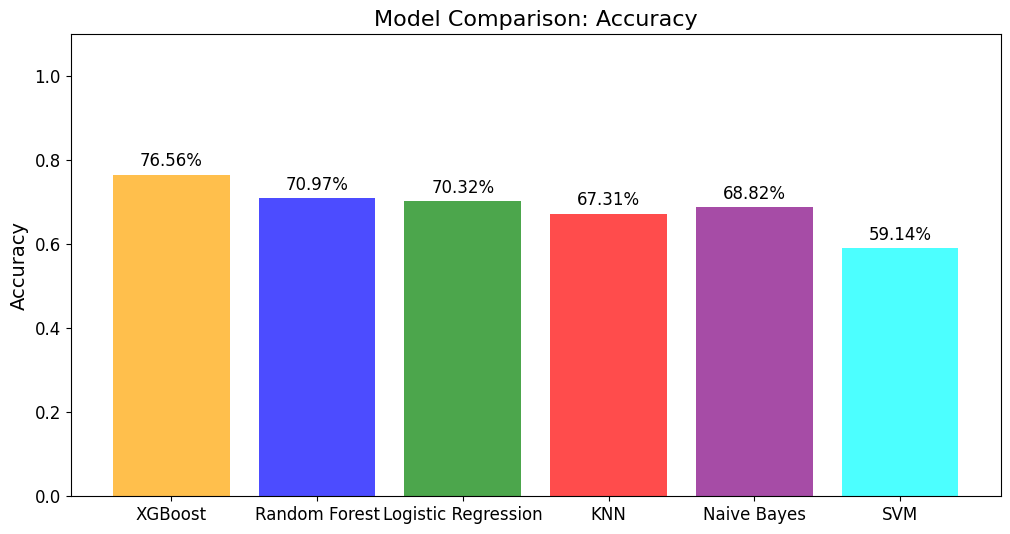


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       145
           1       0.78      0.92      0.84       320

    accuracy                           0.77       465
   macro avg       0.74      0.67      0.69       465
weighted avg       0.76      0.77      0.75       465


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.21      0.31       145
           1       0.72      0.93      0.82       320

    accuracy                           0.71       465
   macro avg       0.66      0.57      0.57       465
weighted avg       0.68      0.71      0.66       465


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.17       145
           1       0.70      0.98      0.82       320

    accuracy                           0.70       465
   macro avg  

In [359]:
# Collect model names and accuracies
models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [accuracy, accuracy_rf, accuracy_logreg, accuracy_knn, accuracy_nb, accuracy_svm]

# Display a bar plot for accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['orange', 'blue', 'green', 'red', 'purple', 'cyan'], alpha=0.7)
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.2f}%", ha='center', fontsize=12)
plt.show()

# Print detailed classification reports
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

In [377]:
# Version 1
#Imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#Beispiel: Annahme, dass sentences und df['NegoOutcomeLabel'] existieren
# sentences: Liste der Texte
# df['NegoOutcomeLabel']: Zielvariable (Labels)
# Tokenisierung der Texte
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_len = 10  # Maximale Länge der Sequenzen
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

#Word2Vec-Details
vocab_size = len(ourfirst_w2v_model.wv.index_to_key) + 1
embedding_dim = ourfirst_w2v_model.vector_size
#Embedding-Matrix vorbereiten
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in ourfirst_w2v_model.wv:
        embedding_matrix[i] = ourfirst_w2v_model.wv[word]

#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['NegoOutcomeLabel'], test_size=0.2, random_state=42
)


#LSTM-Modell definieren
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=True),  # Embeddings nicht trainieren
    LSTM(128, return_sequences=False),  # Anpassung je nach Bedarf
    Dense(1, activation='sigmoid')  # Binäre Klassifikation
])

#Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

#Modelltraining
history = model.fit(
    X_train, np.array(y_train),
    validation_data=(X_test, np.array(y_test)),
    epochs=10,  # Reduziere auf 10 für schnelleren Test
    batch_size=16,  # Passe Batch-Größe an
    verbose=1
)

#Evaluierung des Modells
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=1)
print(f"Testgenauigkeit: {accuracy:.4f}")

#Vorhersagen und Bericht
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

print(classification_report(y_test, binary_predictions))


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │     1,987,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,987,800 (7.58 MB)

 Trainable params: 1,987,800 (7.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6705 - loss: 0.6364 - val_accuracy: 0.6452 - val_loss: 0.6759
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 0.5798 - val_accuracy: 0.6473 - val_loss: 0.6590
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7487 - loss: 0.5489 - val_accuracy: 0.6667 - val_loss: 0.6459
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8265 - loss: 0.4033 - val_accuracy: 0.6452 - val_loss: 0.6612
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9100 - loss: 0.2398 - val_accuracy: 0.6559 - val_loss: 0.7103
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9475 - loss: 0.1584 - val_accuracy: 0.6452 - val_loss: 0.8542
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9558 - loss: 0.1278 - val_accuracy: 0.6323 - val_loss: 1.1233
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9801 - loss: 0.0681 - val_accuracy: 0.

In [378]:
# Version 2
# Imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Beispiel: Annahme, dass sentences und df['NegoOutcomeLabel'] existieren
# sentences: Liste der Texte
# df['NegoOutcomeLabel']: Zielvariable (Labels)

# Tokenisierung der Texte
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_len = 10  # Maximale Länge der Sequenzen
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Word2Vec-Details
vocab_size = len(ourfirst_w2v_model.wv.index_to_key) + 1
embedding_dim = ourfirst_w2v_model.vector_size

# Embedding-Matrix vorbereiten
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in ourfirst_w2v_model.wv:
        embedding_matrix[i] = ourfirst_w2v_model.wv[word]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['NegoOutcomeLabel'], test_size=0.2, random_state=42
)

# LSTM-Modell definieren
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=True),  # Embeddings trainierbar
    LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3),  # Anpassung je nach Bedarf
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')  # Binäre Klassifikation
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Modelltraining
history = model.fit(
    X_train, np.array(y_train),
    validation_data=(X_test, np.array(y_test)),
    epochs=10,  # Reduziere auf 10 für schnelleren Test
    batch_size=16,  # Passe Batch-Größe an
    verbose=1,
)

# Evaluierung des Modells
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=1)
print(f"Testgenauigkeit: {accuracy:.4f}")

# Vorhersagen und Bericht
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

print(classification_report(y_test, binary_predictions))

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │     1,987,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,987,800 (7.58 MB)

 Trainable params: 1,987,800 (7.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6735 - loss: 0.6402 - val_accuracy: 0.6409 - val_loss: 0.6536
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6881 - loss: 0.6383 - val_accuracy: 0.6430 - val_loss: 0.6600
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.6231 - val_accuracy: 0.6387 - val_loss: 0.6500
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7034 - loss: 0.5992 - val_accuracy: 0.6409 - val_loss: 0.6611
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6873 - loss: 0.6035 - val_accuracy: 0.6430 - val_loss: 0.6513
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7324 - loss: 0.5651 - val_accuracy: 0.6387 - val_loss: 0.6208
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7682 - loss: 0.5023 - val_accuracy: 0.6559 - val_loss: 0.6485
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8229 - loss: 0.3951 - val_accuracy: 0